# PRODIGY_DS_03

 # Task 3: **Build a decision tree classifier to predict whether a customer will purchase  a product or service based on their demographic and behavioural data**

### Dataset - https://archive.ics.uci.edu/dataset/222/bank+marketing

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
%matplotlib inline
import warnings
warnings

<module 'warnings' from 'C:\\Users\\hp\\anaconda3\\Lib\\warnings.py'>

In [3]:
# Load the dataset
bank = pd.read_csv(r"D:\Sushil Gupta\Internship\Prodigy Data Science Intern\PRODIGY_DS_03\bank.csv",sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


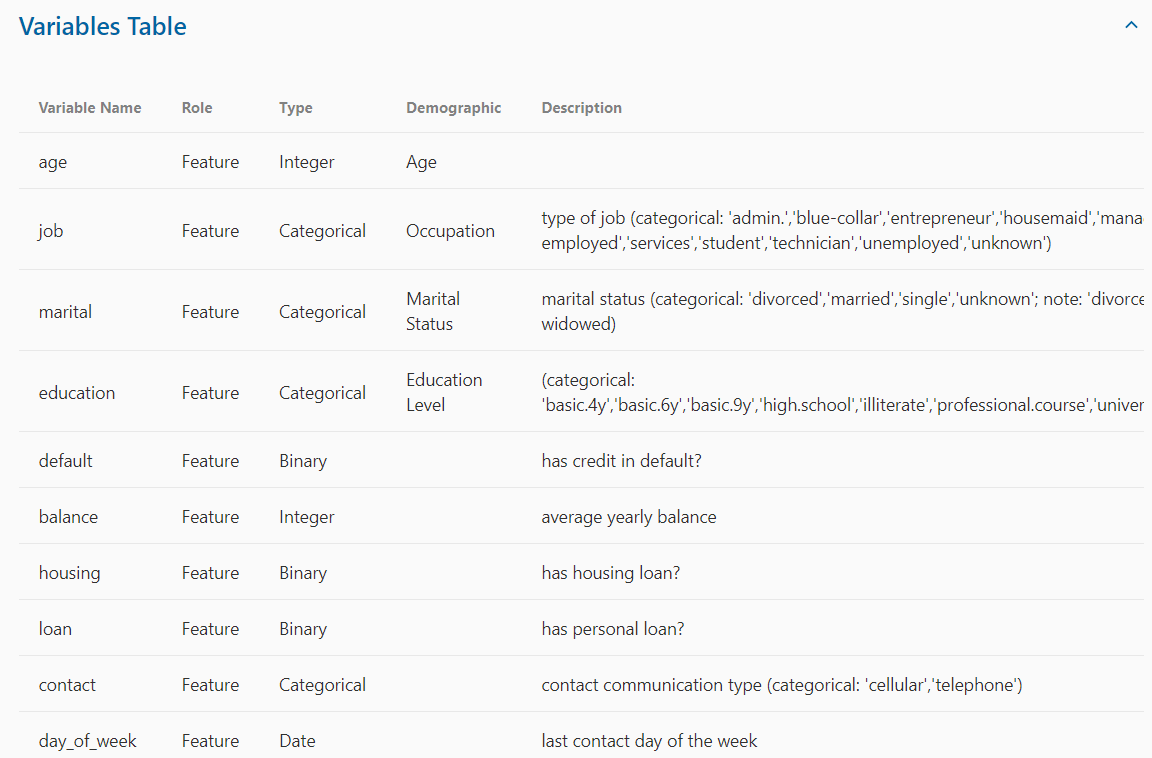
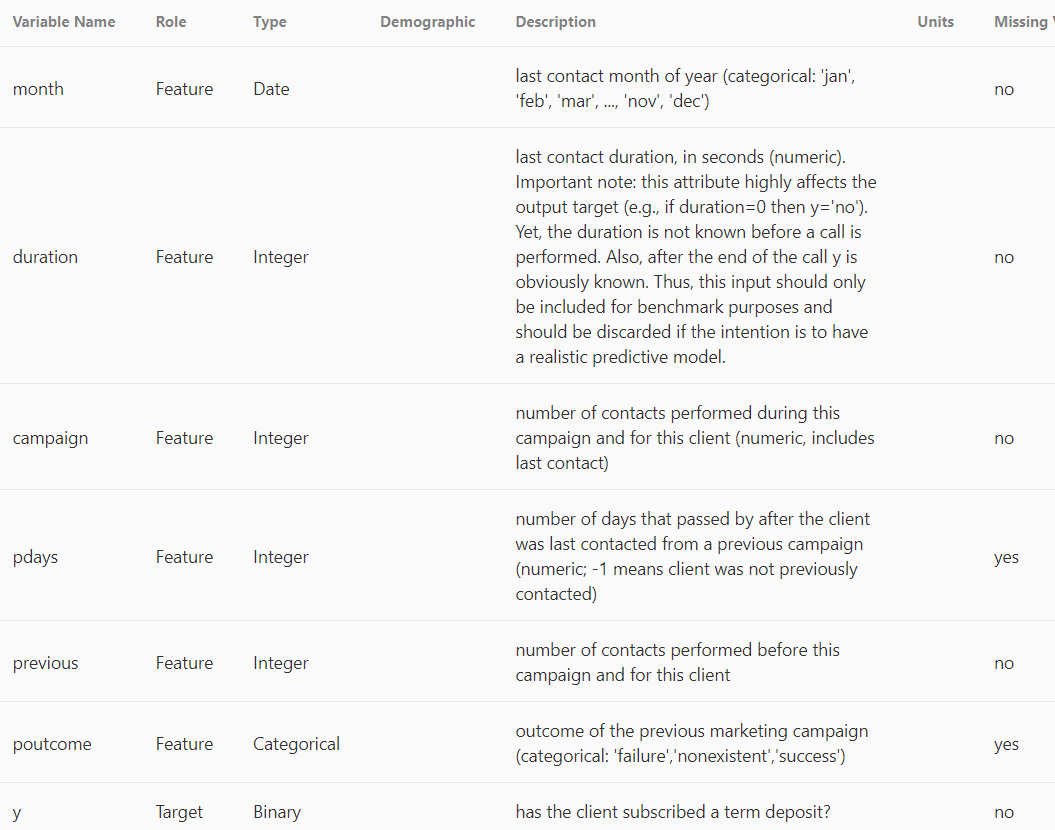

In [4]:
# Display the shape(row, column) of the dataset
bank.shape

(4521, 17)

Initially we have 4521 rows and 17 columns

In [5]:
# Display different unique columns of the dataset
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [6]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
bank.describe()


Summary Statistics:


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
# Display basic information about the dataset
print("Dataset Info:")
bank.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


We have 7 features of int value attributes and 10 of object data types

In [8]:
#Checking the null values in the dataset
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No Null values in given dataset

In [9]:
# Checking for any duplicates in the dataset
bank.duplicated().sum()

0

No duplicate values in given dataset

In [10]:
# Display the count of unique value in the y columns
bank['y'].value_counts()

y
no     4000
yes     521
Name: count, dtype: int64

In [11]:
100*bank['y'].value_counts()/len(bank['y'])

y
no     88.476001
yes    11.523999
Name: count, dtype: float64

# Data Visualization

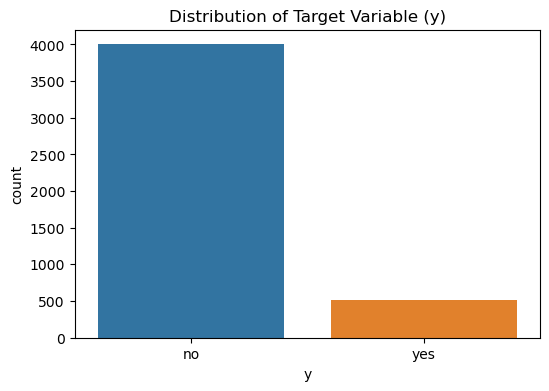

In [12]:
# Visualize the distribution of the target variable 'y'
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=bank)
plt.title('Distribution of Target Variable (y)')
plt.show()

The term deposit data shows high variation 88.47% are no and 11.53% are yes. Data is highly imbalanced, ratio = 88:11. So we'll analyse the data with other features while taking the target values separately to get some insights.

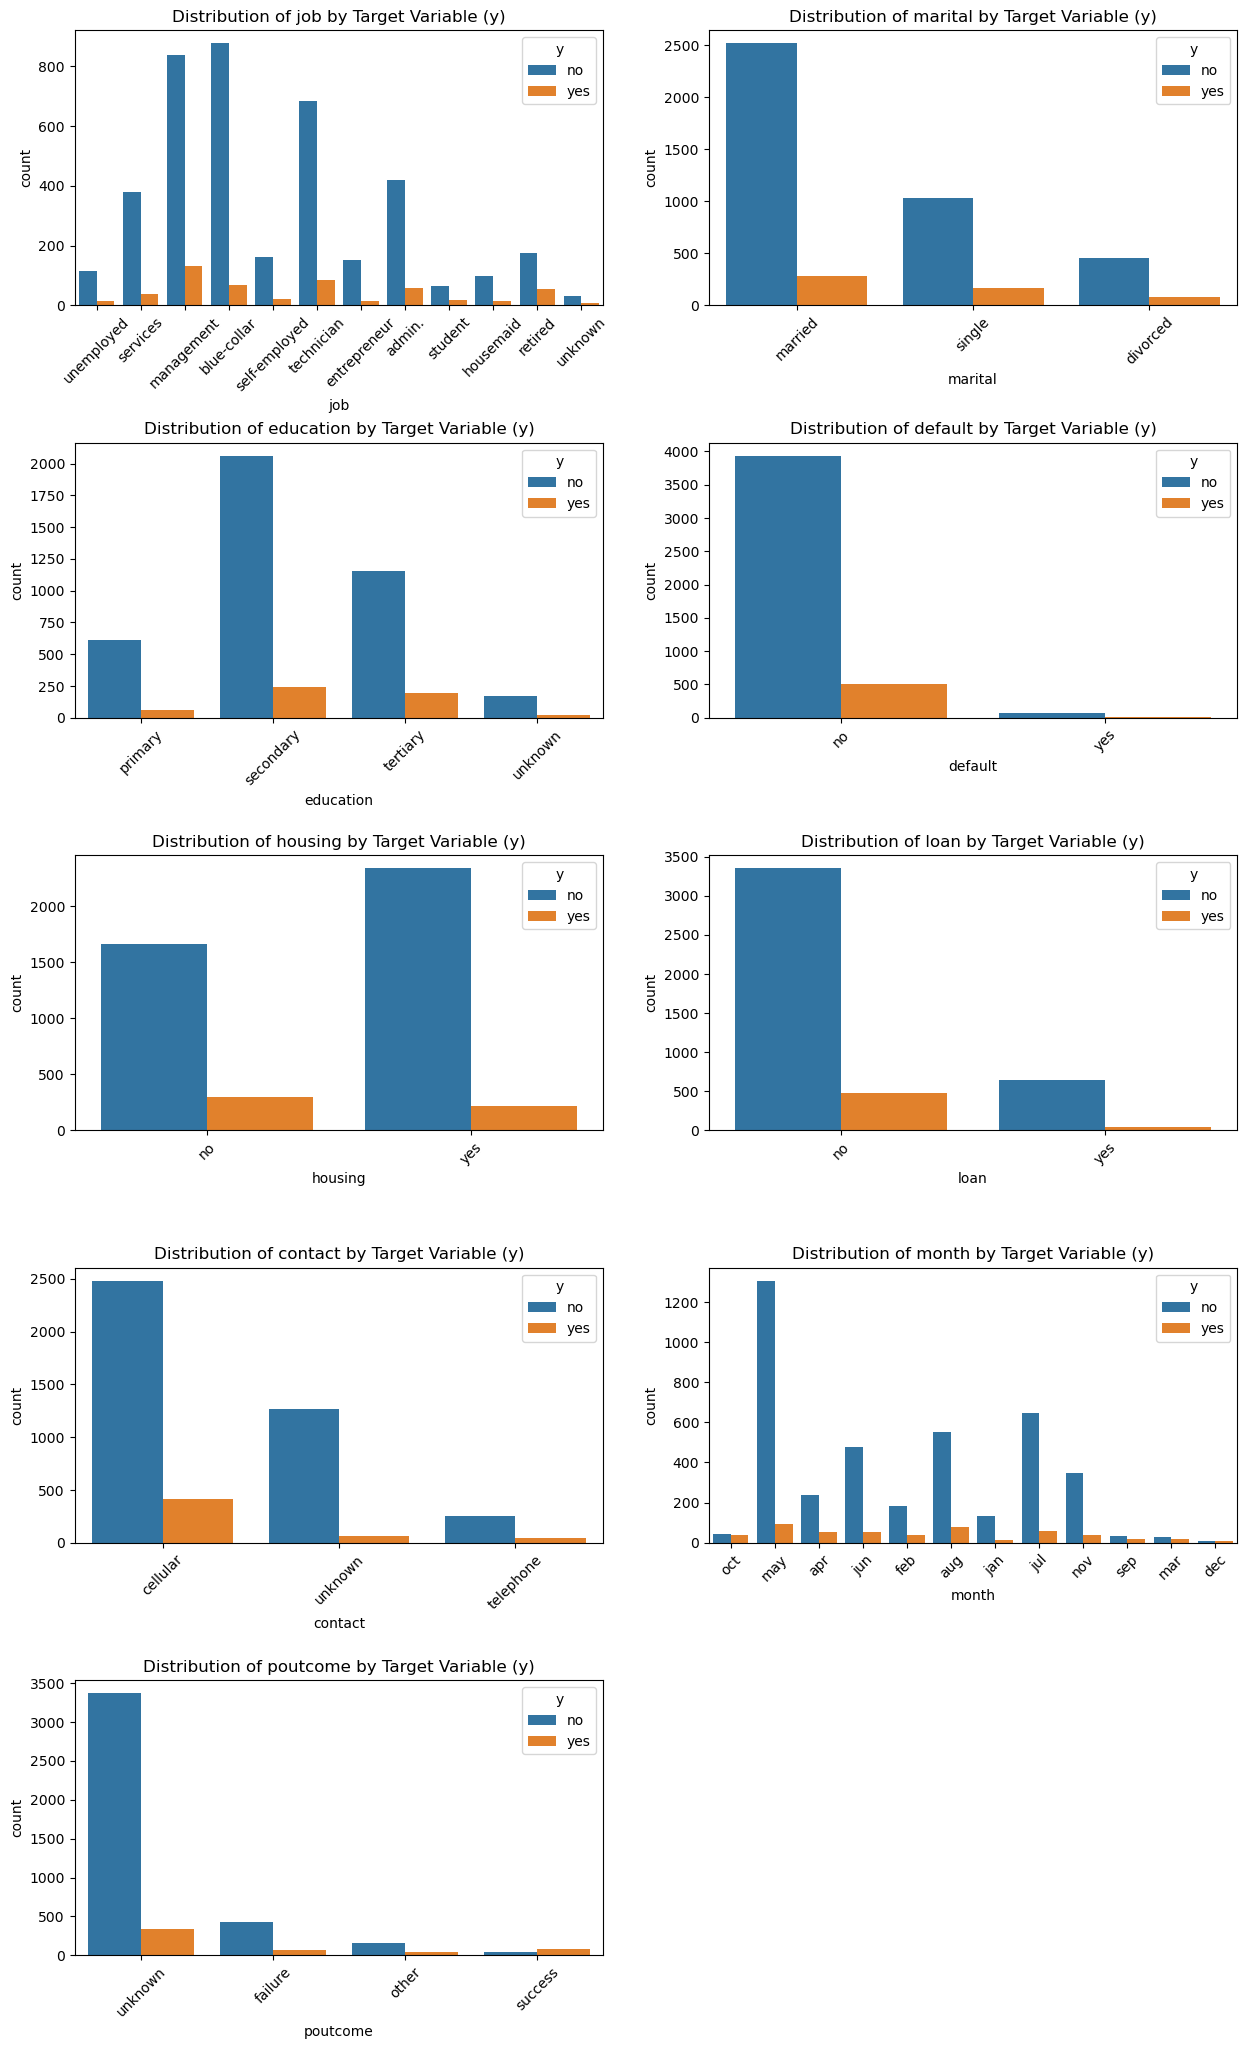

In [13]:
# Visualize the distribution of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Calculate the number of rows and columns needed for subplots
num_features = len(categorical_features)
num_rows = (num_features + 1) // 2  # Ensure an even number of rows for better layout
num_cols = 2

# Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(categorical_features):
    row, col = i // num_cols, i % num_cols
    sns.countplot(x=feature, hue='y', data=bank, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature} by Target Variable (y)')
    axes[row, col].tick_params(axis='x', rotation=45)

# Remove empty subplots if the number of features is odd
if num_features % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.show()

* Job- People who are in services, management or self employed have lower chances of churning out as compared to others.
* Marital - People with marital status have lower chances of churning out as compared to others.
* Education - People studying in secondary and tertiary have lower chances of churning out as compared to others.
* Default - People who are already a credit defaulter are less likely to churn out
* Housing - People who has took housing loan have lower chances of churning out as compared to others
* Loan - People who has not took loan have high chances of churning out as compared to others
* contact - People having cellular/ mobile number active are less likely to churn out as compared to others
* month - May month is when there is max. churn out followed by july, august and june, min. churn can be seen in mar.,dec. month 

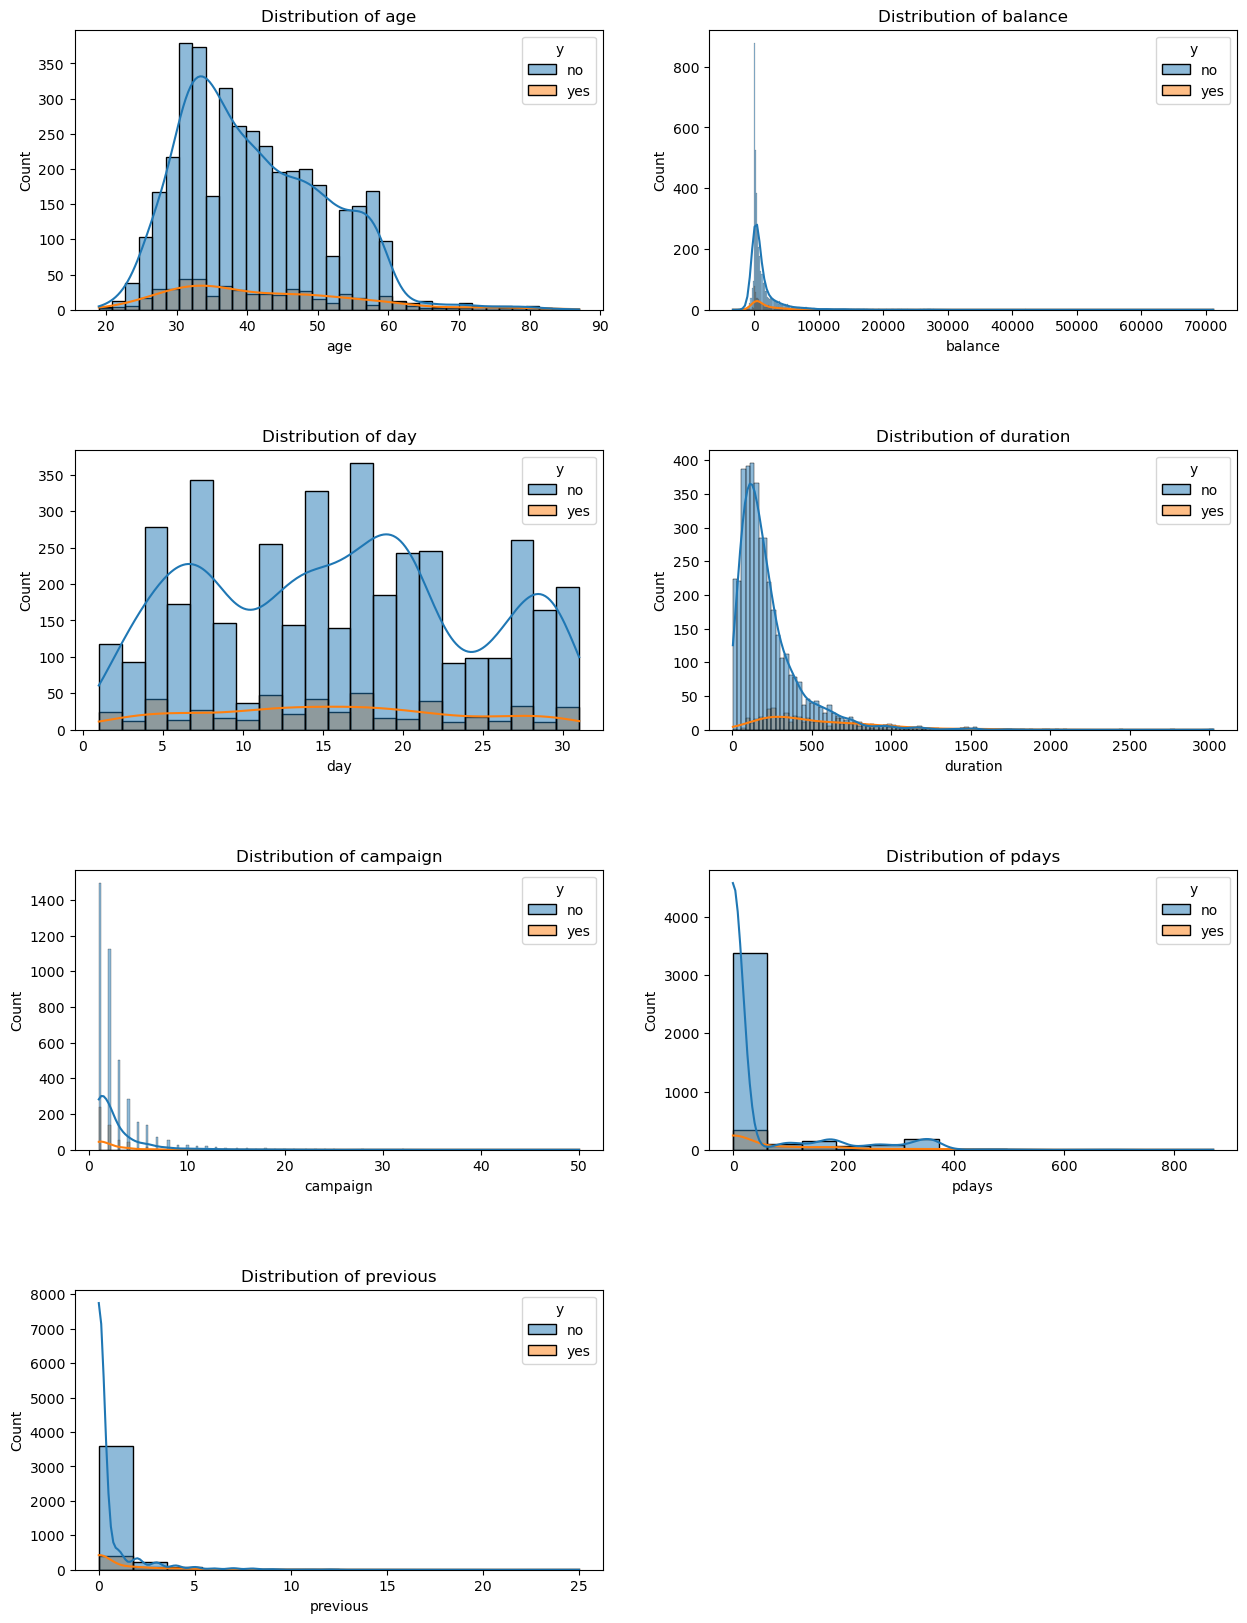

In [14]:
# Explore the distribution of numerical features
numerical_features = bank.select_dtypes(include=['int64', 'float64']).columns

# Set up subplots
num_rows = len(numerical_features) // 2 + len(numerical_features) % 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(numerical_features):
    row, col = i // 2, i % 2
    sns.histplot(x=feature, hue='y', data=bank,kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature}')

# Remove empty subplots if the number of features is odd
if len(numerical_features) % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.show()

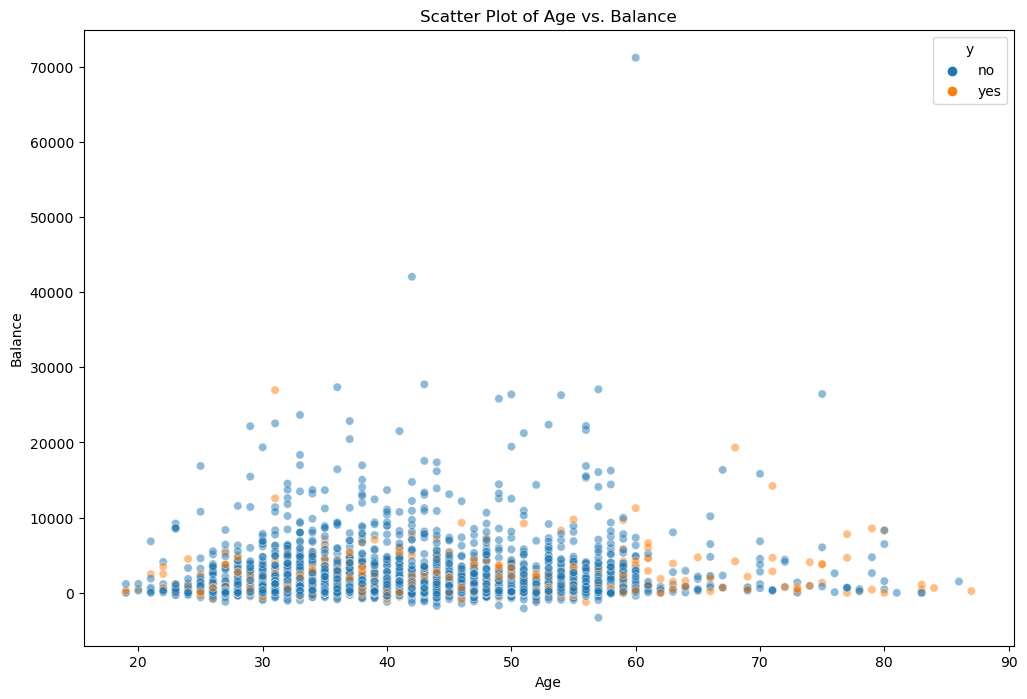

In [15]:
# Explore the relationship between 'age' and 'balance'
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='balance', hue='y', data=bank, alpha=0.5)
plt.title('Scatter Plot of Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

People with low balance have higher chances to churn out, whereas people with age<60 and higher balance has less chances to churn out and people with age > 60 with low balance has higher chances to churn out

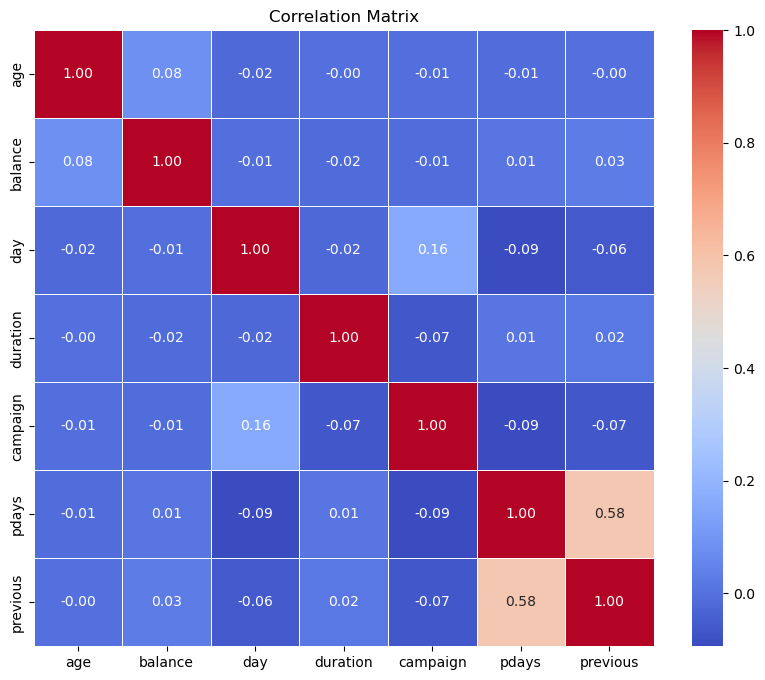

In [16]:
# Explore the correlation between numerical features
correlation_matrix = bank[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We'll copy the data in another dataframe to avoid data loss of orignal data. 

In [17]:
churn = bank.copy()

In [18]:
churn.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# **Data Cleaning**

We can drop 'day' & 'month' columns as 'pdays' gives the number of days that passed by after the client was last contacted from a previous campaign

In [19]:
#Dropping the day, month columns
churn.drop(["day","month"],axis =1, inplace = True)

There are many unknown entries we need to replace them as null/Nan

In [20]:
# Finding the entries with "unknown" in the dataset
for i in churn.columns:
    churn[i] = np.where(churn[i] == "unknown", np.nan, churn[i])
churn.isna().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [21]:
# % of unknown entries in the poutcome
(3705/churn.poutcome.shape[0])*100

81.95089581950896

After replacing unknown values as null we find 'poutcome' has 3705 null entries i.e. about 81.9% null values, this feature is of no need we can simply drop it.

In [22]:
(1324/churn.contact.shape[0])*100

29.285556292855563

Similarly it doesnt matter if 'contact' was through cellular or telephone it doesnt affect the target variable, so we can drop this feature

In [23]:
# Dropping the poutcome
churn.drop("poutcome", inplace = True, axis = 1)

In [24]:
churn.drop("contact", inplace = True, axis = 1)

In [25]:
churn.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,79.0,1.0,-1.0,0.0,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,220.0,1.0,339.0,4.0,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,185.0,1.0,330.0,1.0,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,199.0,4.0,-1.0,0.0,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,226.0,1.0,-1.0,0.0,no


# **Data Pre-processing**

As 'job' & 'education' has lower null values we'll fill  them using fillna method instead of dropping

In [26]:
# The "ffill" method stands for "forward fill" and it fills missing values with the preceding non-null value in the column
churn["job"].fillna(method = "ffill",inplace=True)

In [27]:
churn["education"].fillna(method = "ffill",inplace= True)

Now we need to convert all categorical data to numerical data. This will allow us to perform calculations on our data

I decided to replace yes and no as 1 & 0 respectively, by defining  a map function including the target variable

In [28]:
varlist=['default','housing','loan','y']

In [29]:
def binary_map(q):
    return q.map({'yes':1,'no':0})

churn[varlist]=churn[varlist].apply(binary_map)

In [30]:
churn.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30.0,unemployed,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0
1,33.0,services,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,4.0,0
2,35.0,management,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,1.0,0
3,30.0,management,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0
4,59.0,blue-collar,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,0.0,0


# **One Hot Encoder**

 Now I dont think of using label encoding for the features 'job', 'marital' & 'education'  as it is only recommended for target variable instead we can use the One Hot Encoder  and dummy variables

In [31]:
one = OneHotEncoder()
churn[list(churn["job"].unique())] = one.fit_transform(churn[["job"]]).A

In [32]:
churn.drop("job",axis = 1, inplace = True)
churn

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired
0,30.0,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33.0,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35.0,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59.0,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,married,secondary,0,-333.0,1,0,329.0,5.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4517,57.0,married,tertiary,1,-3313.0,1,1,153.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4518,57.0,married,secondary,0,295.0,0,0,151.0,11.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4519,28.0,married,secondary,0,1137.0,0,0,129.0,4.0,211.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Assuming churn['education'] is categorical
edu = pd.get_dummies(churn['education'])

# Convert boolean values to integers (0 and 1)
edu = edu.astype(int)
edu

,primary,secondary,tertiary
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
4516,0,1,0
4517,0,0,1
4518,0,1,0
4519,0,1,0


In [34]:
edu=pd.get_dummies(churn['education'],drop_first=True)

# Convert boolean values to integers (0 and 1)
edu = edu.astype(int)
edu

,secondary,tertiary
0,0,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
4516,1,0
4517,0,1
4518,1,0
4519,1,0


we can drop the primary column as it can be predicted with the help of other dummy variables

In [35]:
# Assuming churn['education'] is categorical
status = pd.get_dummies(churn['marital'])

# Convert boolean values to integers (0 and 1)
status = status.astype(int)
status

,divorced,married,single
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
4516,0,1,0
4517,0,1,0
4518,0,1,0
4519,0,1,0


In [36]:
status=pd.get_dummies(churn['marital'],drop_first=True)

# Convert boolean values to integers (0 and 1)
status = status.astype(int)
status

,married,single
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
4516,1,0
4517,1,0
4518,1,0
4519,1,0


In [37]:
churn=pd.concat([churn,edu,status],axis=1)
churn

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,30.0,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,33.0,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,35.0,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,30.0,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,59.0,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,married,secondary,0,-333.0,1,0,329.0,5.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
4517,57.0,married,tertiary,1,-3313.0,1,1,153.0,1.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0
4518,57.0,married,secondary,0,295.0,0,0,151.0,11.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
4519,28.0,married,secondary,0,1137.0,0,0,129.0,4.0,211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


In [38]:
churn.drop("marital",axis = 1, inplace = True)
churn.drop("education",axis = 1, inplace = True)
churn

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,0,-333.0,1,0,329.0,5.0,-1.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
4517,57.0,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0
4518,57.0,0,295.0,0,0,151.0,11.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
4519,28.0,0,1137.0,0,0,129.0,4.0,211.0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


# **Univariate analysis**

In [39]:
churn_d = churn.copy()

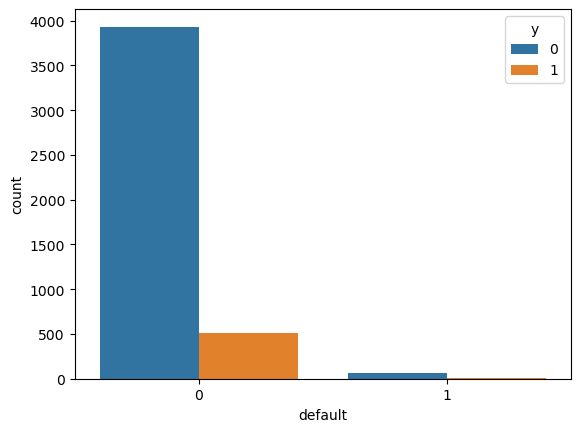

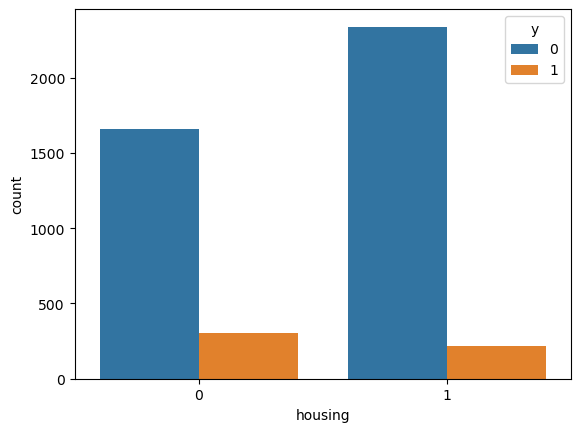

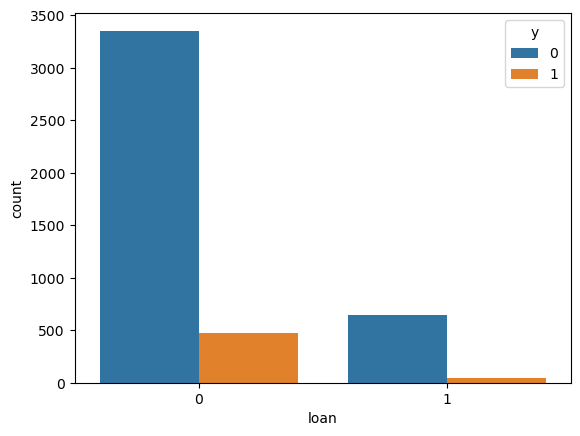

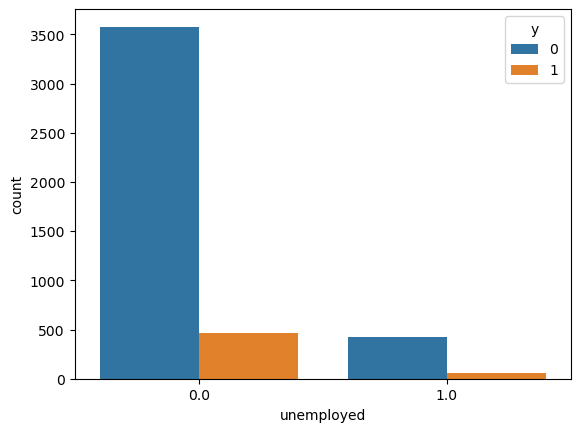

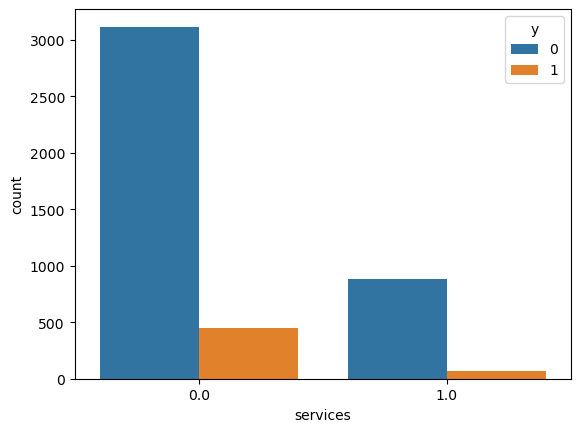

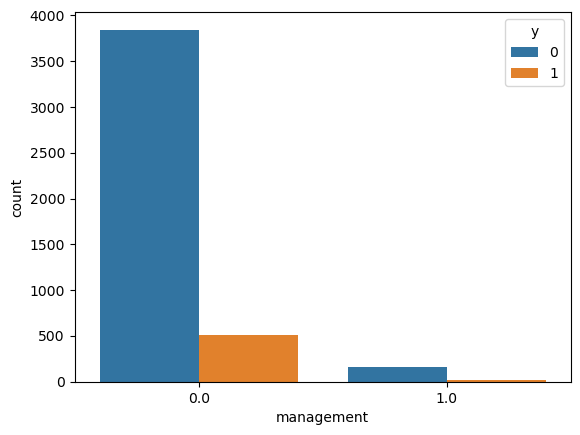

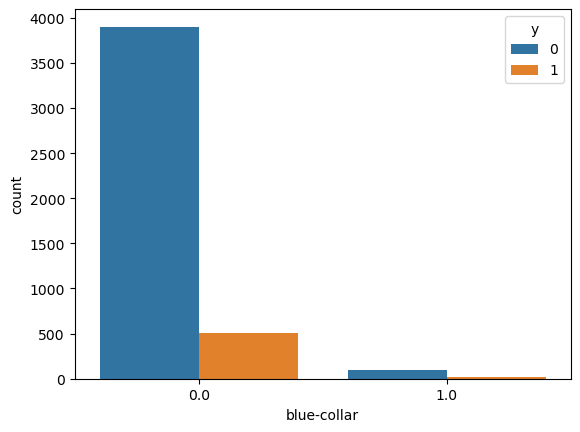

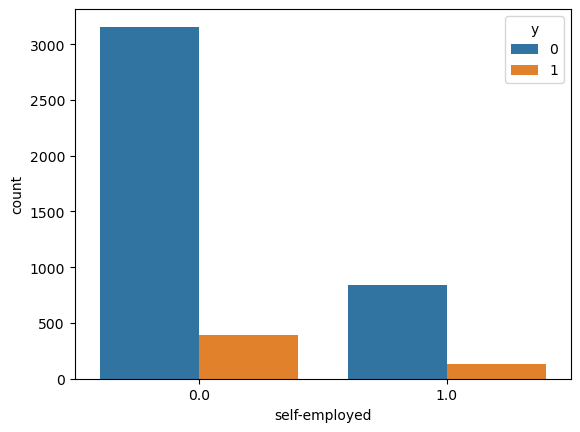

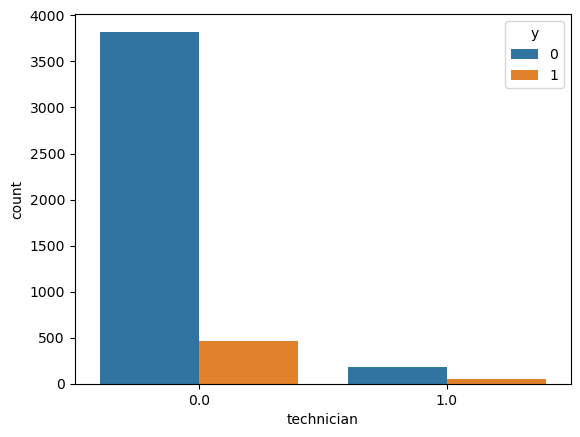

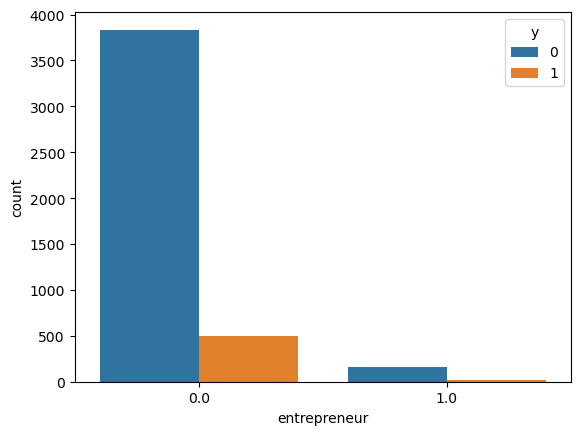

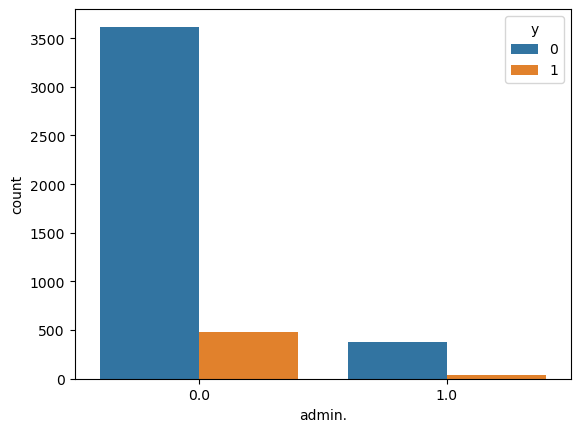

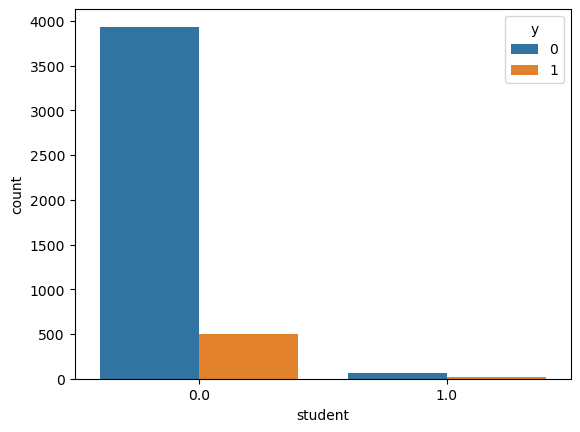

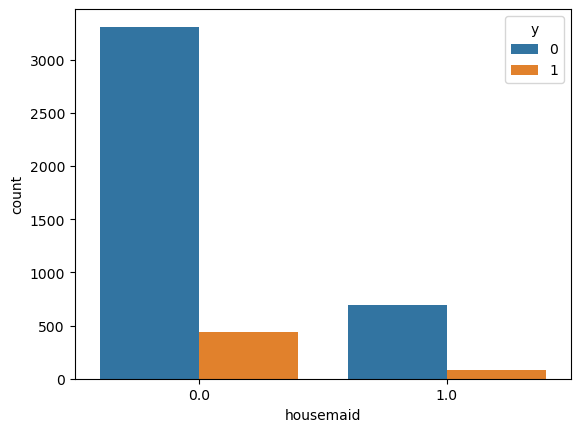

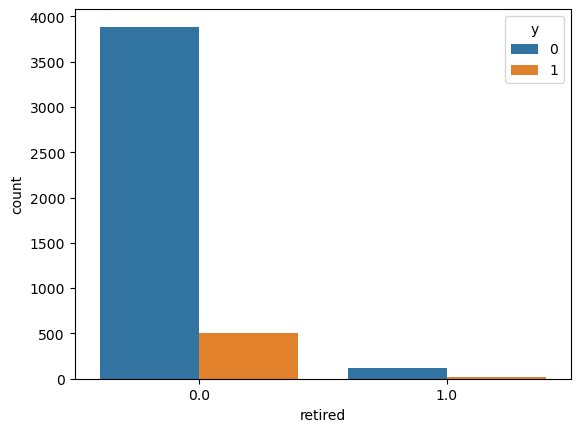

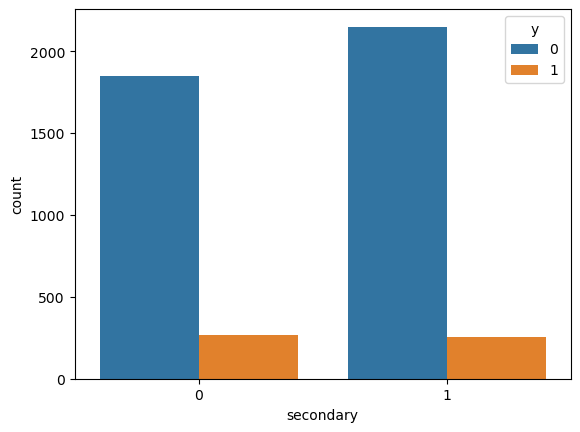

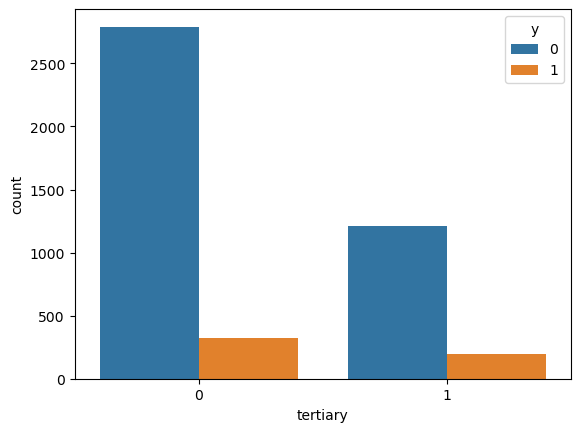

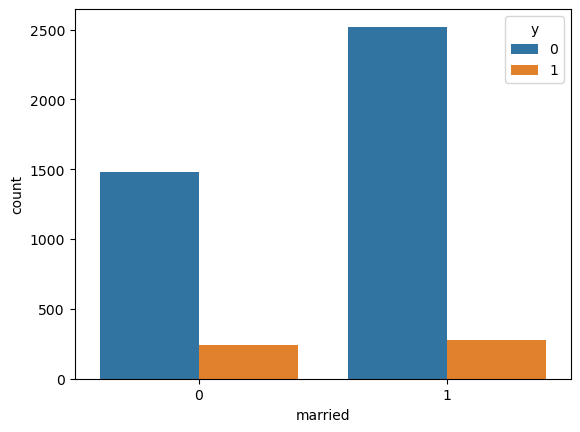

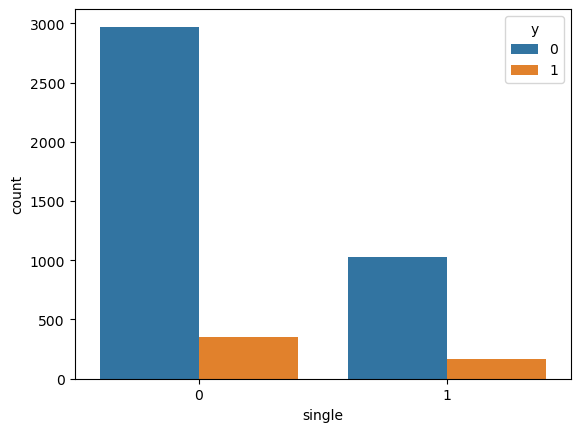

In [40]:
for i,predictor in enumerate(churn_d.drop(columns=['y','age','campaign','previous', 'balance', 'duration','pdays'])):
    plt.figure(i)
    sns.countplot(data=churn_d, x=predictor, hue='y')

<Axes: >

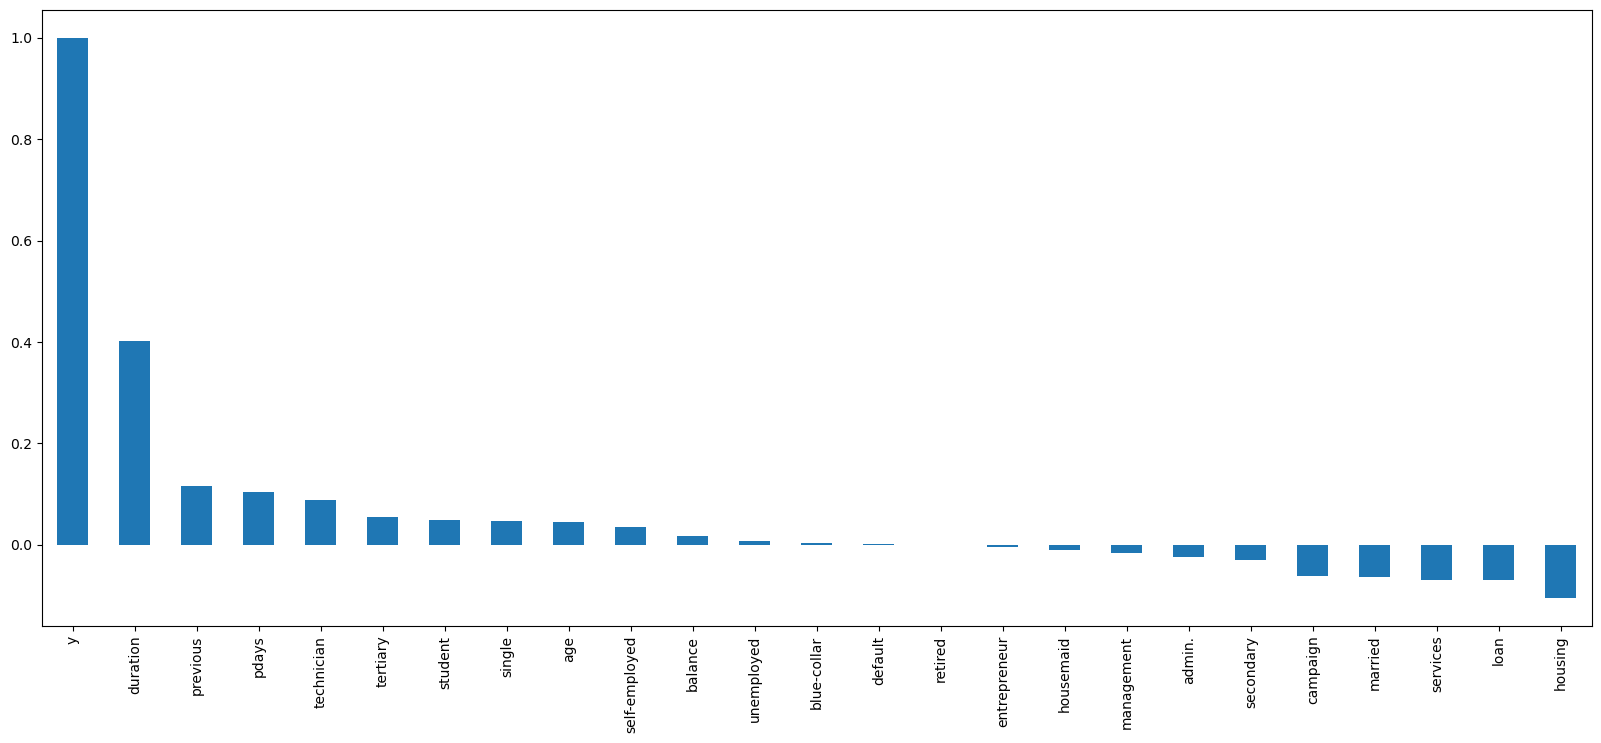

In [41]:
plt.figure(figsize=(20,8))
churn_d.corr()['y'].sort_values(ascending = False).plot(kind='bar')

**Heatmap to gain insights about correlation**

<Axes: >

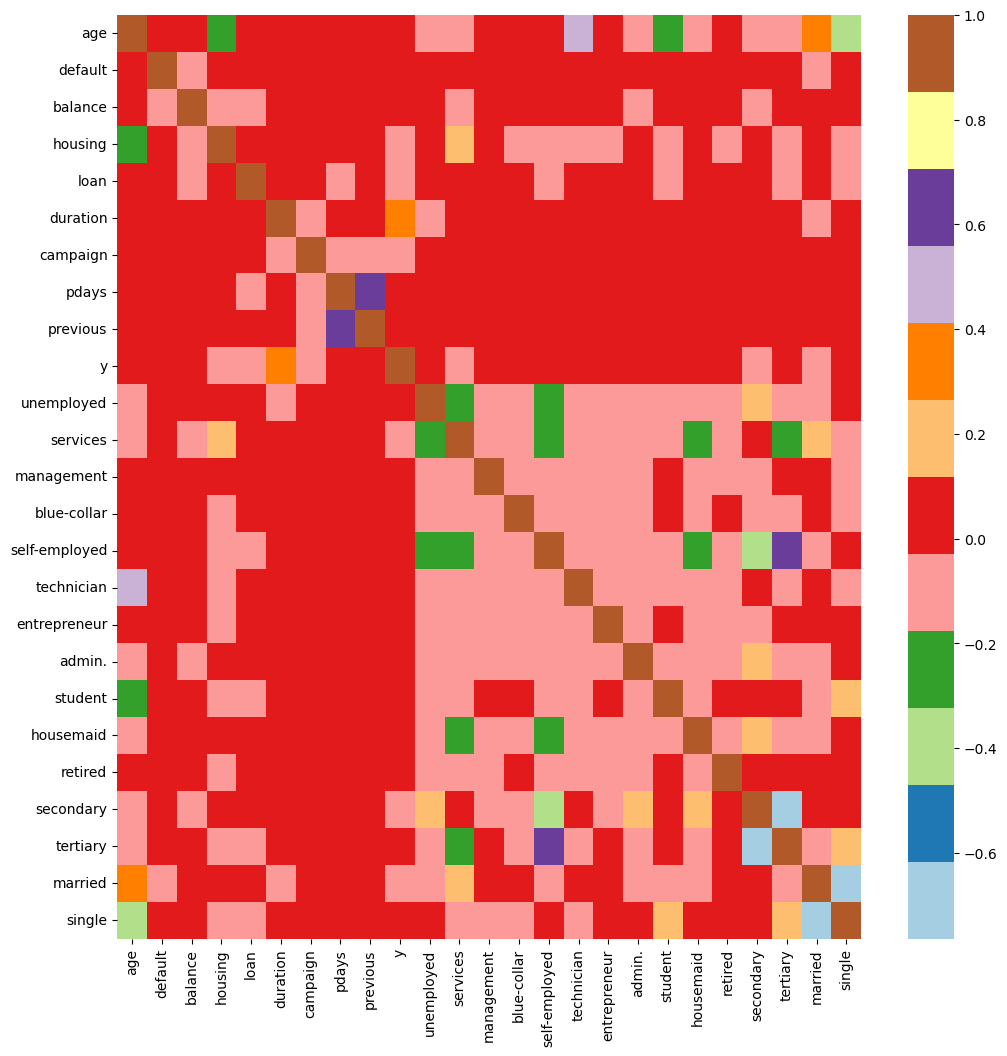

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(churn_d.corr(), cmap="Paired")

In [43]:
churn_d.to_csv('churn_model.csv')

# **Model Building**

In [44]:
df=pd.read_csv("D:\Sushil Gupta\Internship\Prodigy Data Science Intern\PRODIGY_DS_03\churn_model.csv")
df.head()

,Unnamed: 0,age,default,balance,housing,loan,duration,campaign,pdays,previous,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


In [45]:
df=df.drop('Unnamed: 0',axis=1)

In [46]:
x=df.drop('y',axis=1)
x

,age,default,balance,housing,loan,duration,campaign,pdays,previous,unemployed,...,technician,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,married,single
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,0,-333.0,1,0,329.0,5.0,-1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,0
4517,57.0,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0
4518,57.0,0,295.0,0,0,151.0,11.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1,0
4519,28.0,0,1137.0,0,0,129.0,4.0,211.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0


In [47]:
y=df['y']
y

0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

# **Decision Tree Classifier**

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [50]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
model_dt.score(x_test,y_test)

0.8983425414364641

In [52]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       804
           1       0.58      0.33      0.42       101

    accuracy                           0.90       905
   macro avg       0.75      0.65      0.68       905
weighted avg       0.88      0.90      0.89       905



In [53]:
print(metrics.confusion_matrix(y_test, y_pred))

[[780  24]
 [ 68  33]]


89.72% accuracy

As the data set were highly unbalanced, we will use upsampling in order to increase accuracy using SMOTEENN

In [54]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [55]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.20)

In [56]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [57]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9123102866779089
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       534
           1       0.91      0.93      0.92       652

    accuracy                           0.91      1186
   macro avg       0.91      0.91      0.91      1186
weighted avg       0.91      0.91      0.91      1186



In [60]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[473  61]
 [ 43 609]]


This method gave 91.23% accuracy, I also tried by changing the criterion to 'entropy' but it achieved 91.38% accuracy only which is less than 'gini' index method